In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
Q1 : By Taking reference of the Housing Price Dataset plot each independent variable with 
    the dependent variable and store the name of independent variable in a list which show 
    non linear behavior 

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
# unimportant col 
data.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [7]:

object_col=(data.select_dtypes(include=['object']).columns)

In [8]:
#list of object col
object_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# filling obj col null val with mode()[0]
for col in object_col:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#convert all obj to numerical val through LE
label_encoder = LabelEncoder()
for col in object_col:
    data[col] = label_encoder.fit_transform(data[col])

In [47]:
# data.info()

In [14]:
# identify the columns with null values
null_columns = data.columns[data.isnull().any()] 

In [15]:
null_columns 

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [17]:
null_counts = data[null_columns].isnull().sum() 

In [18]:
# name of null col with null val present 
null_counts

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [19]:
# fill all null col with mean
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

In [22]:
#convert all data into float
data= data.astype(float)  

In [48]:
# data.info()

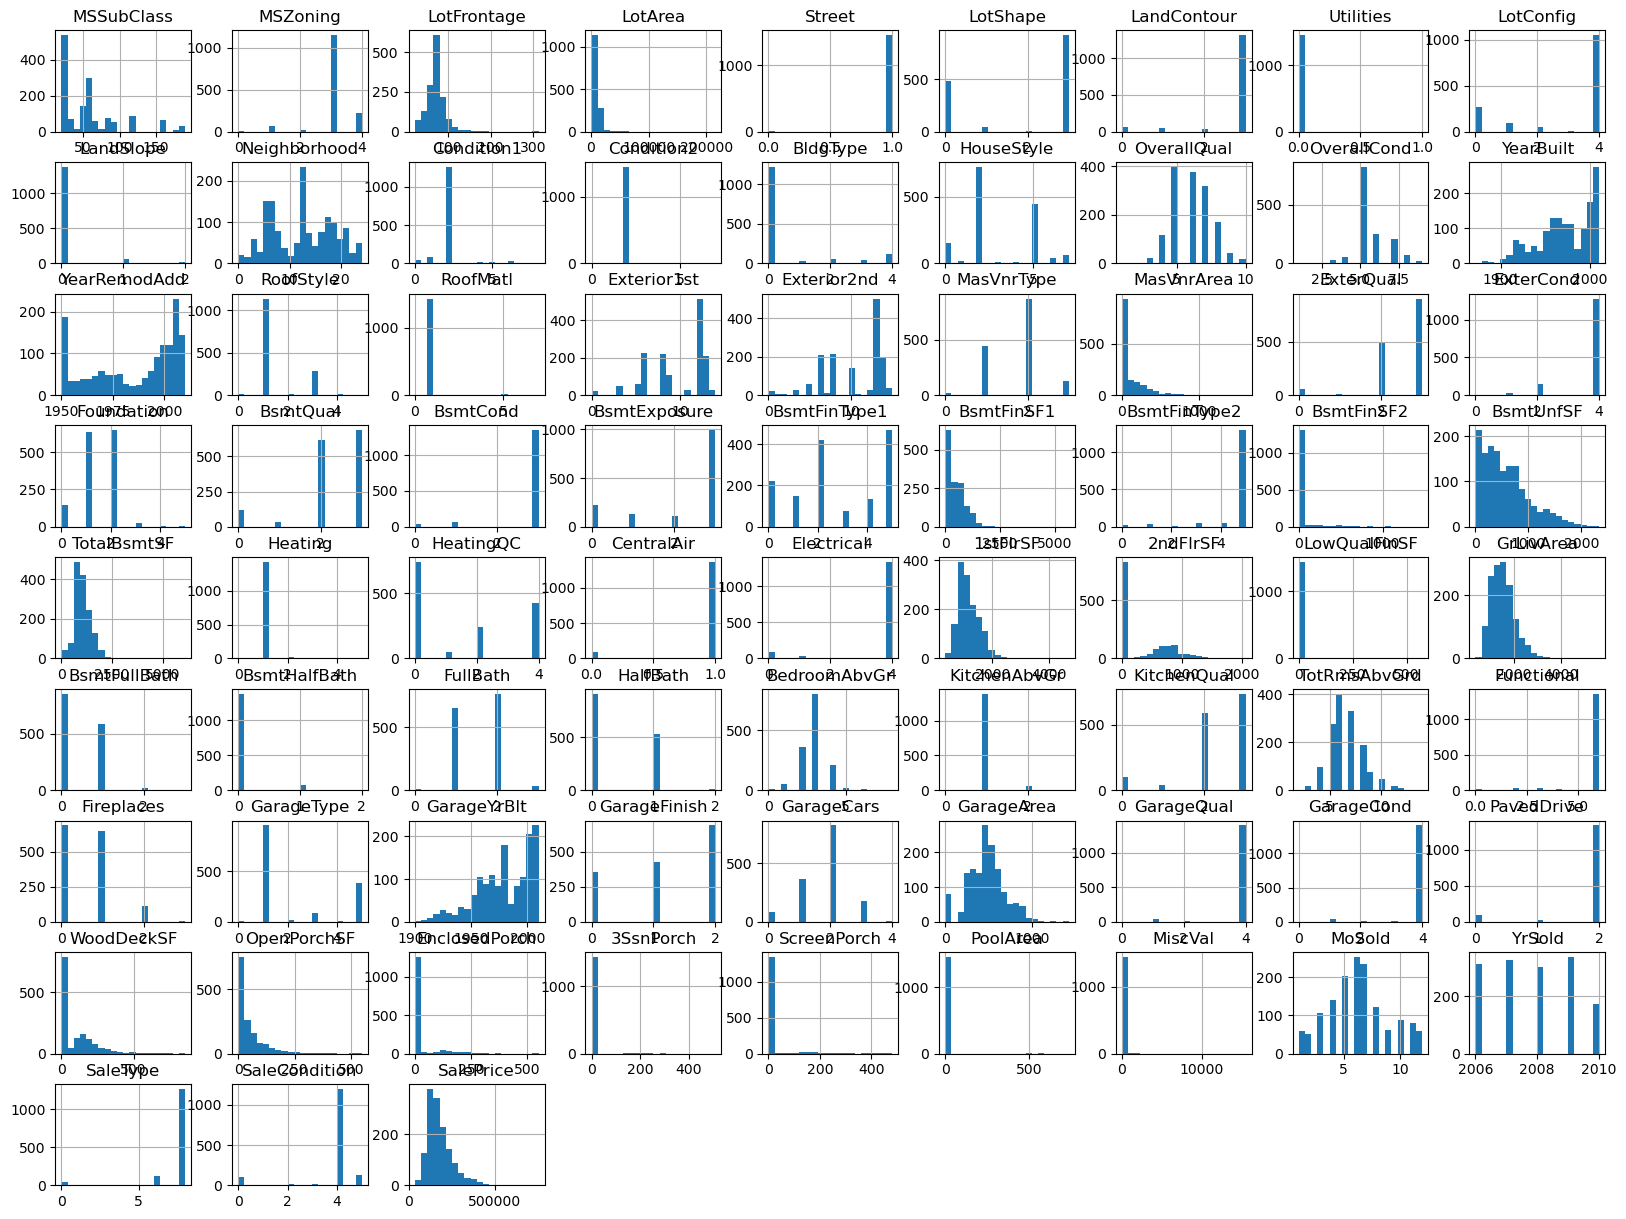

In [29]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,15))
plt.show()



In [49]:
# Housing Price Dataset plot each independent variable with the dependent variable

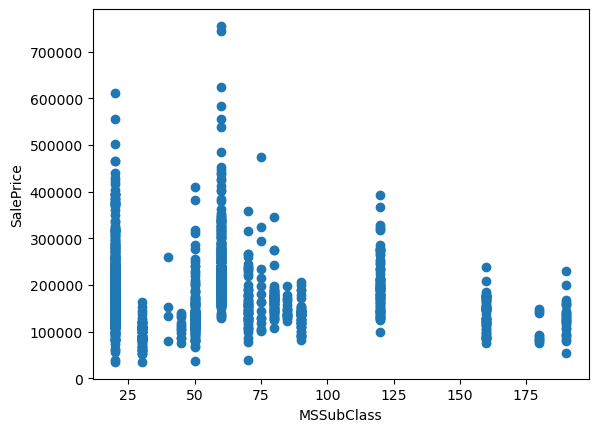

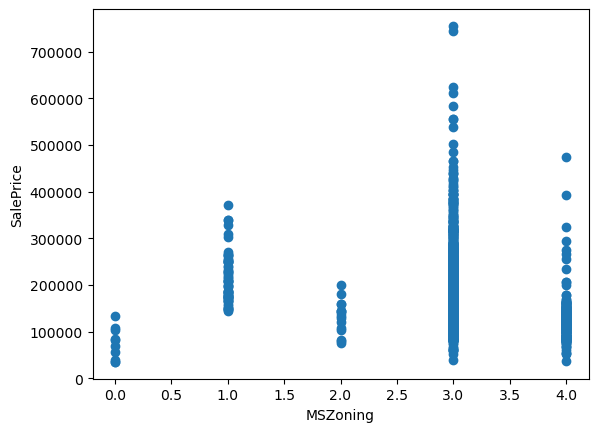

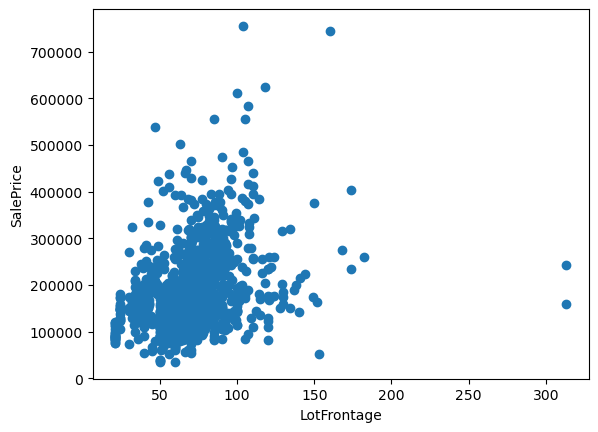

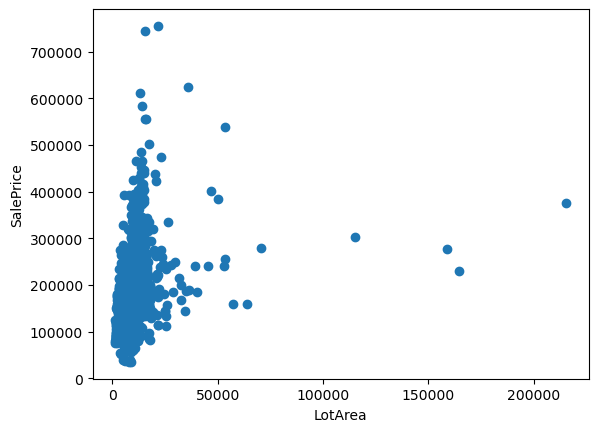

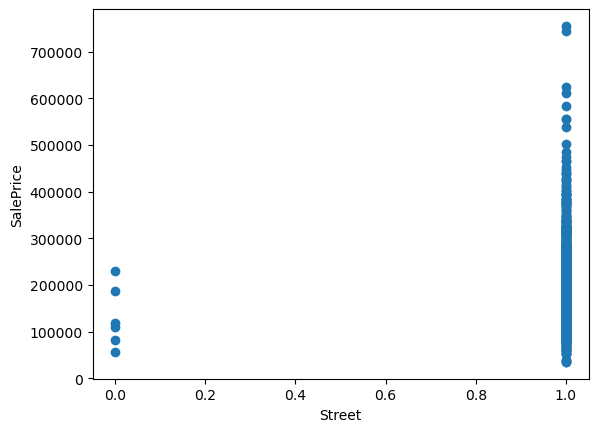

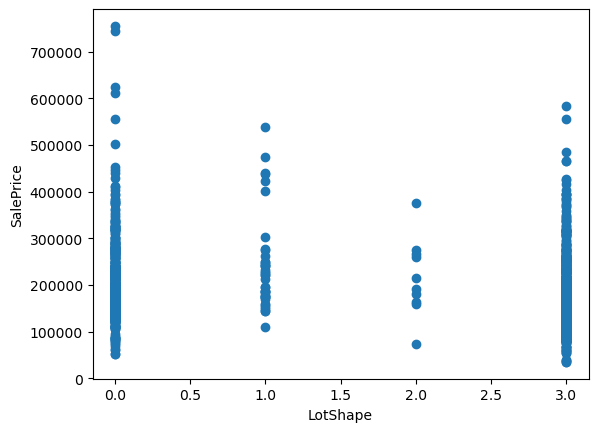

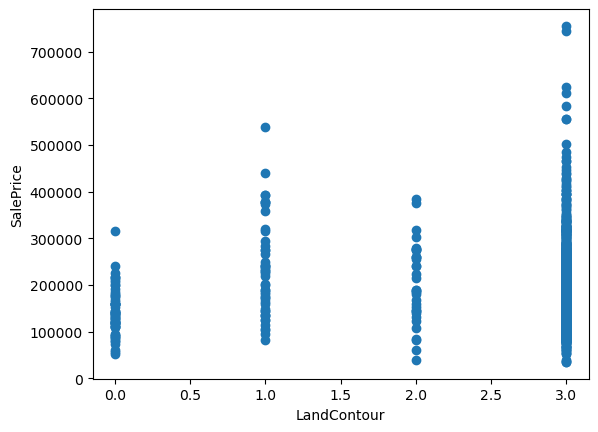

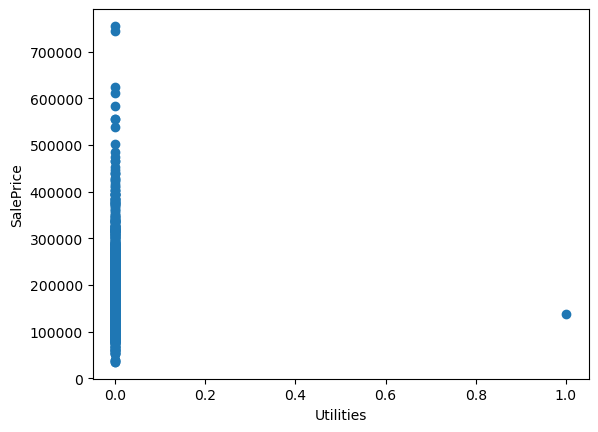

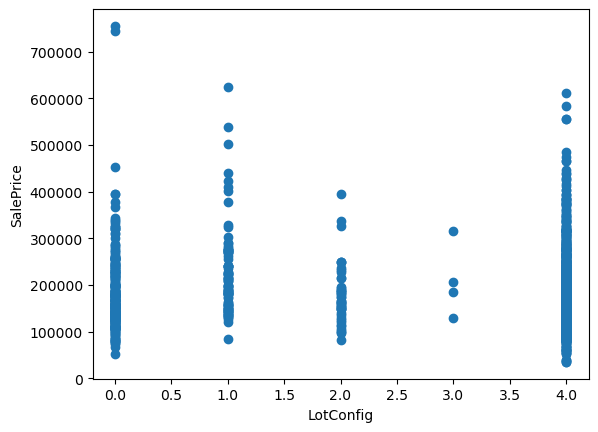

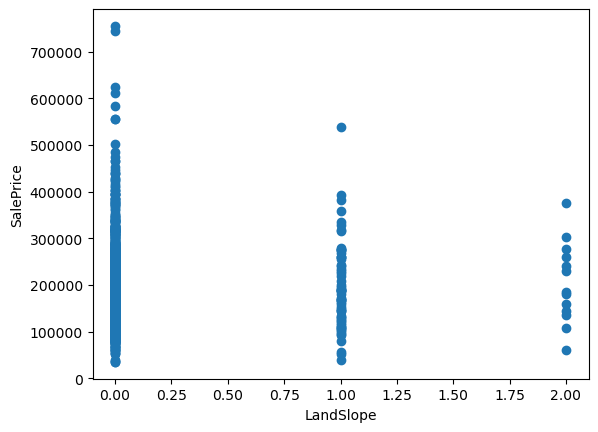

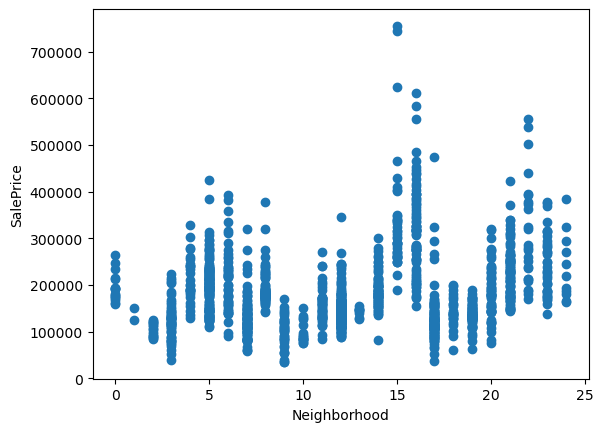

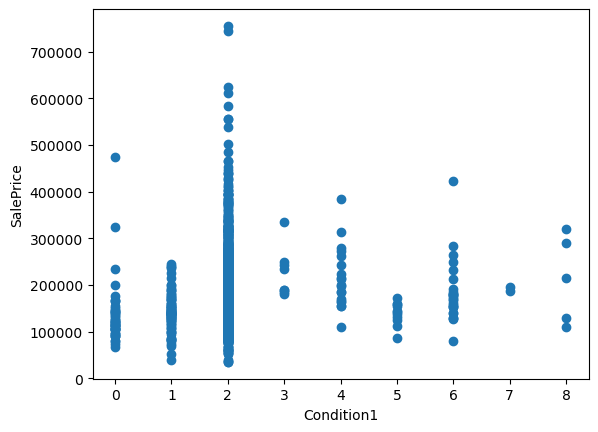

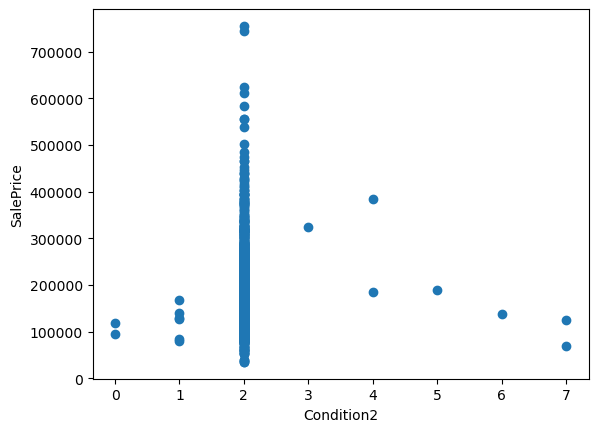

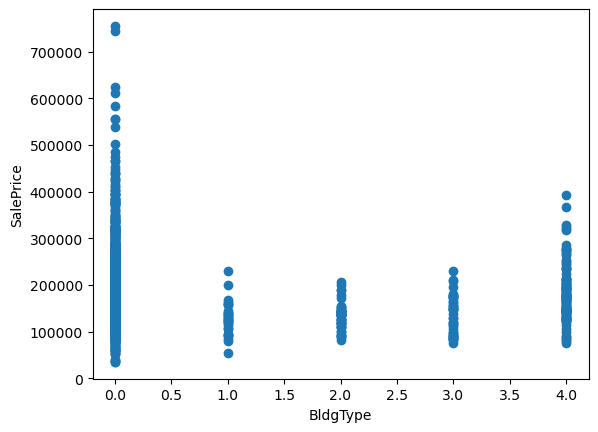

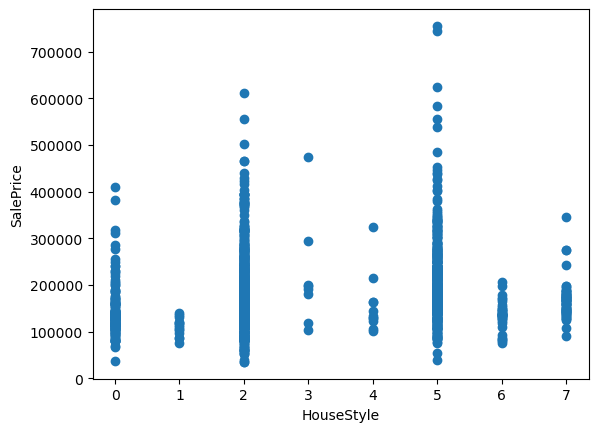

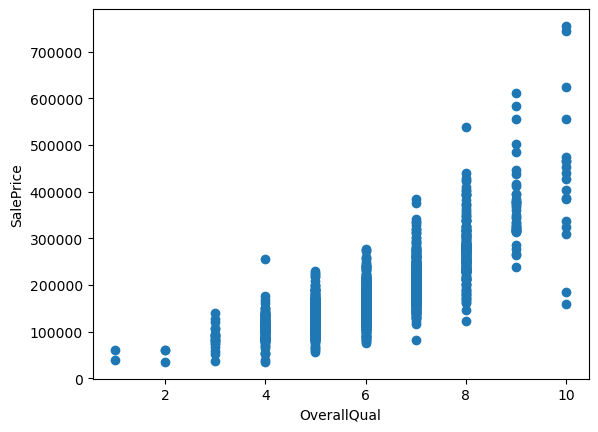

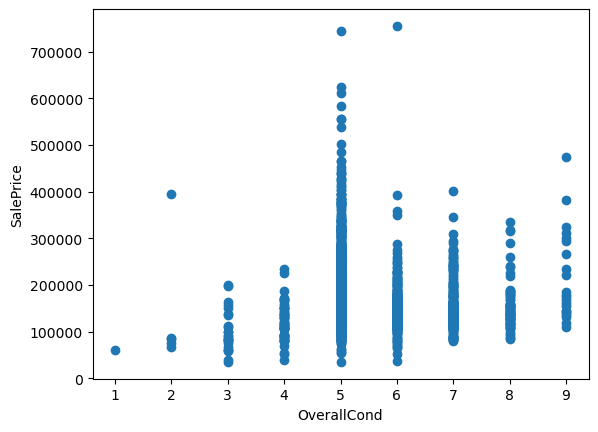

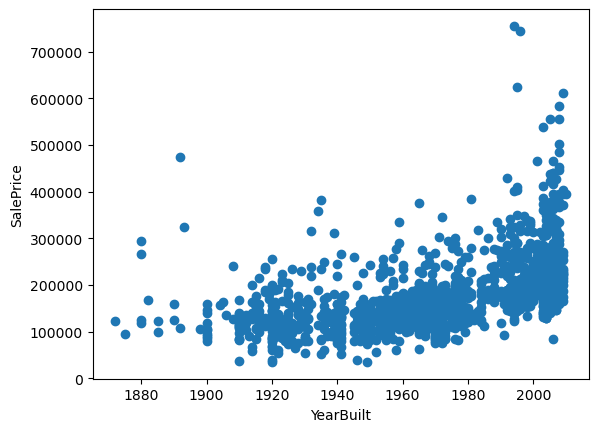

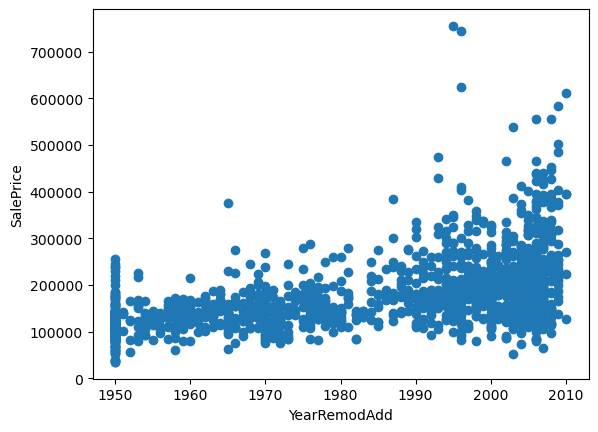

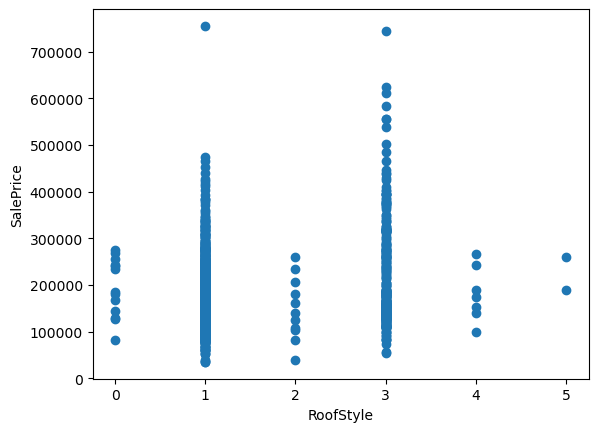

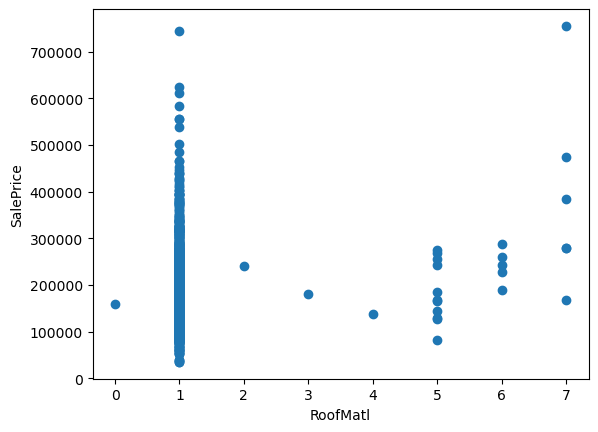

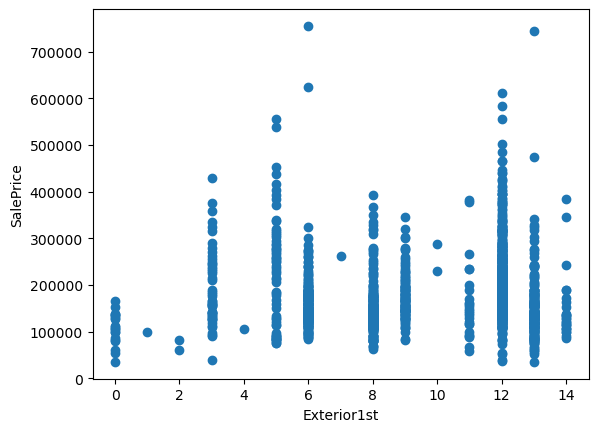

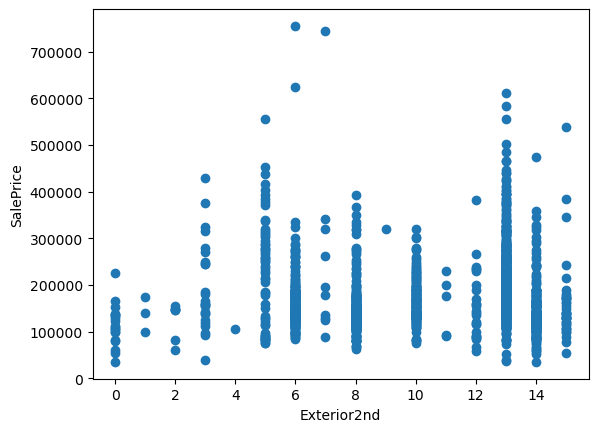

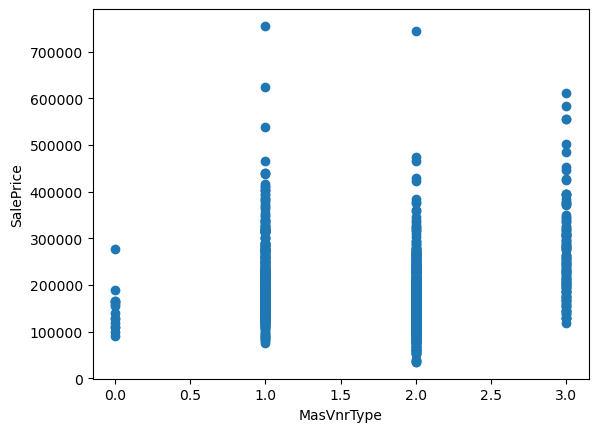

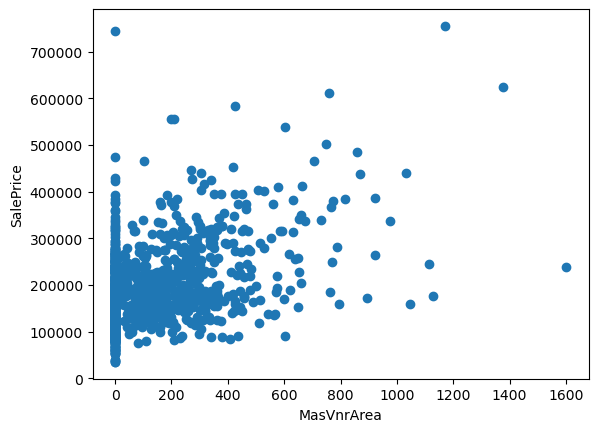

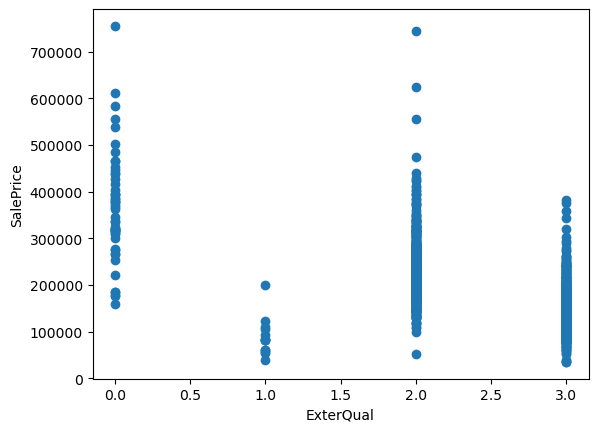

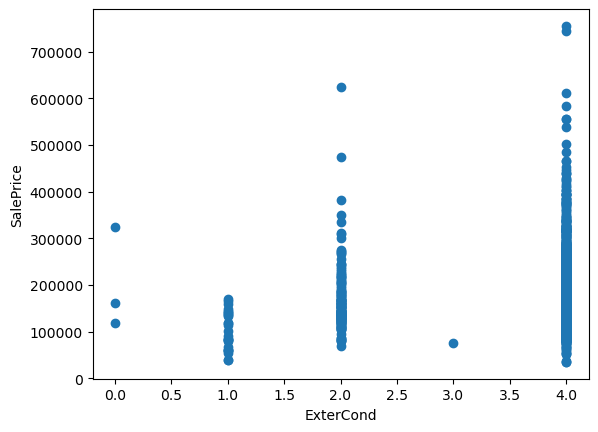

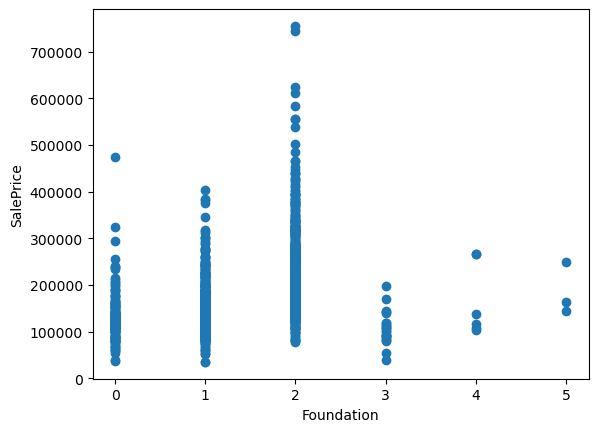

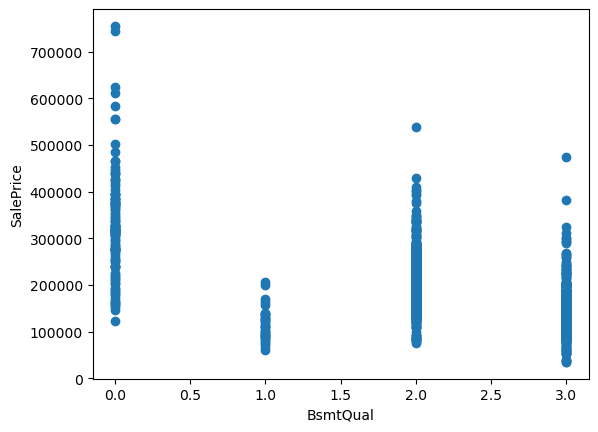

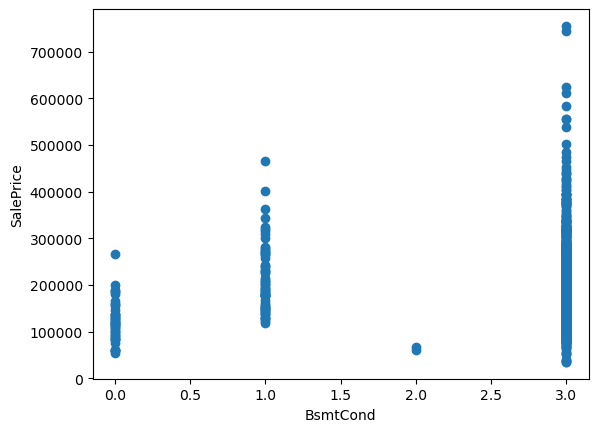

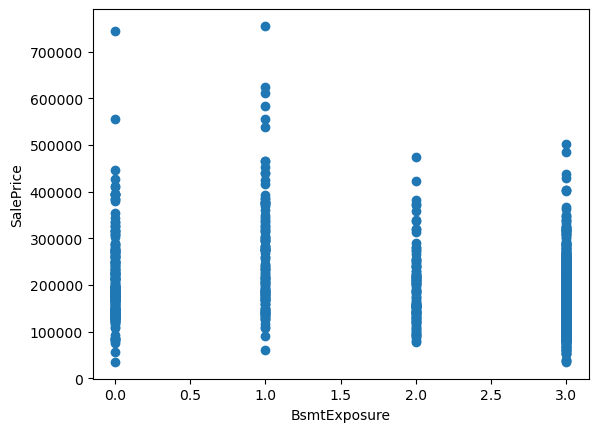

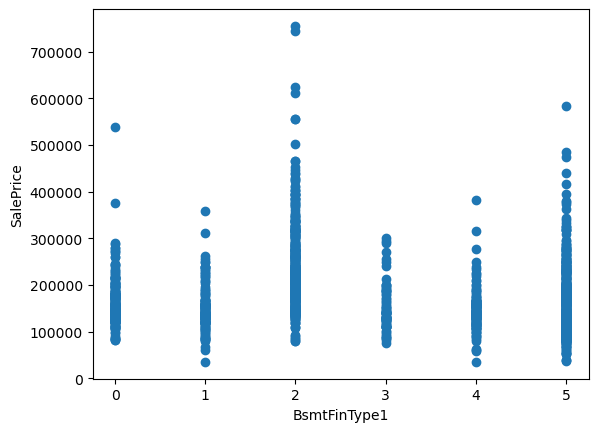

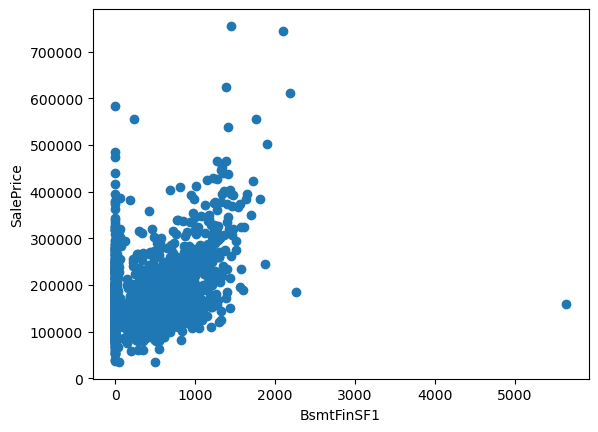

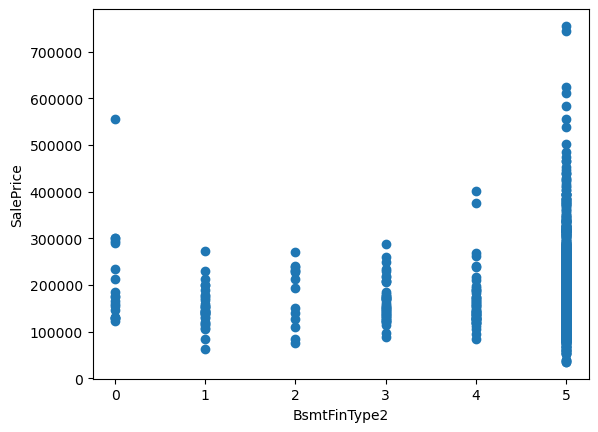

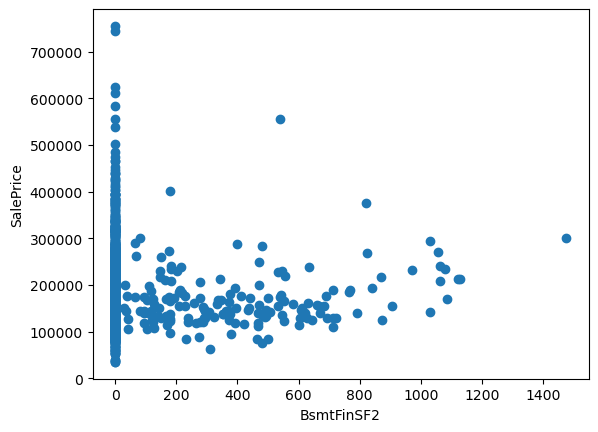

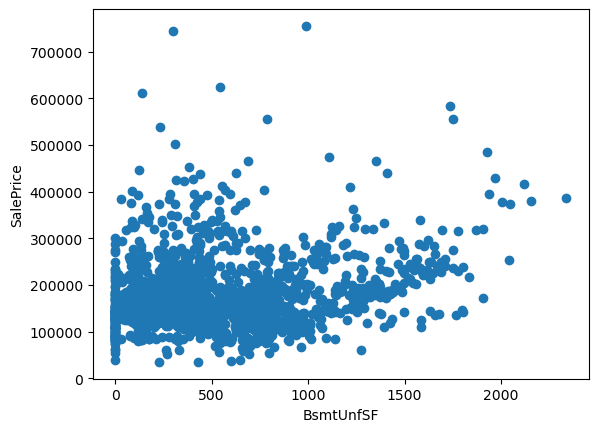

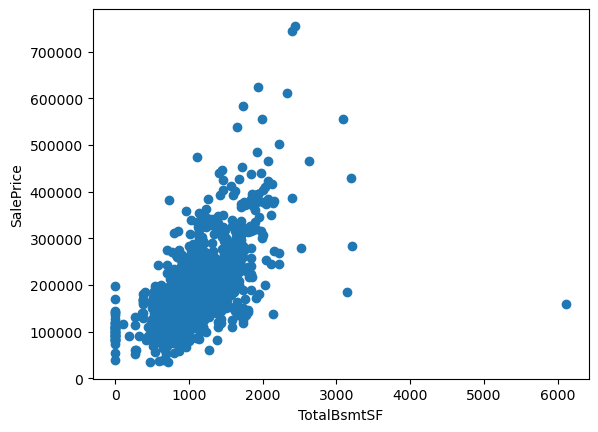

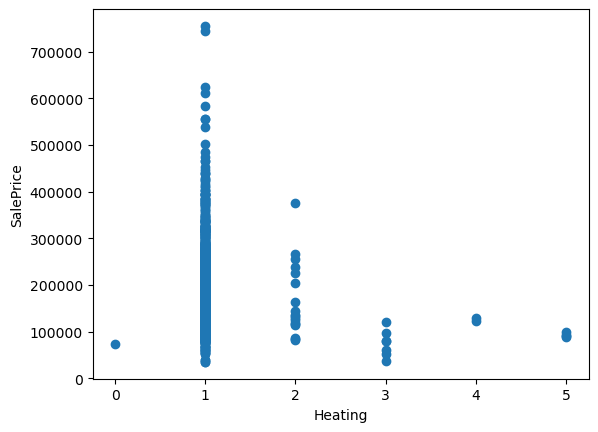

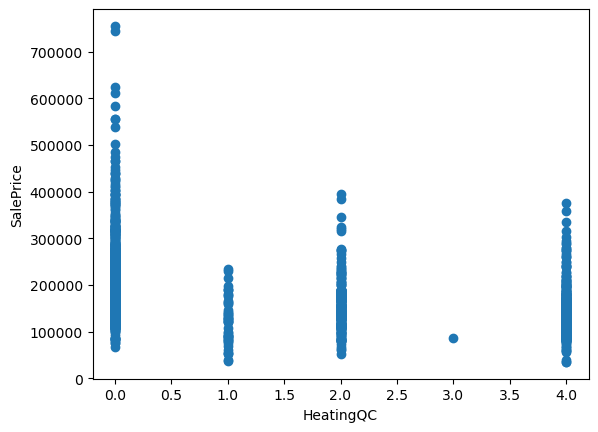

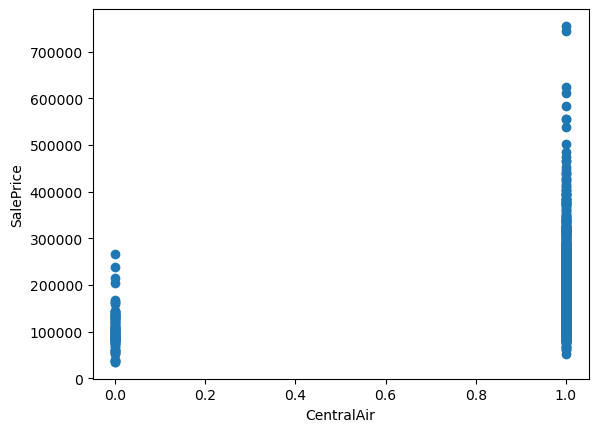

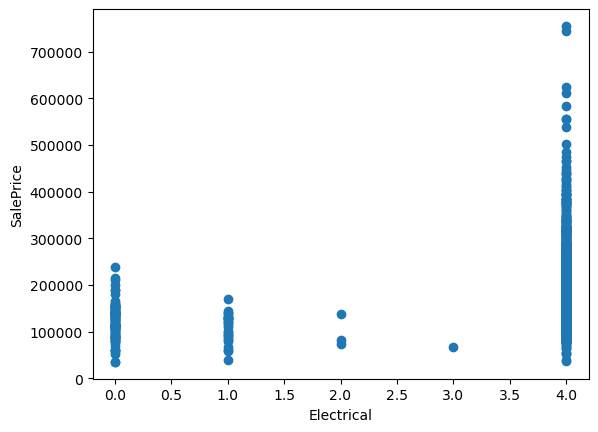

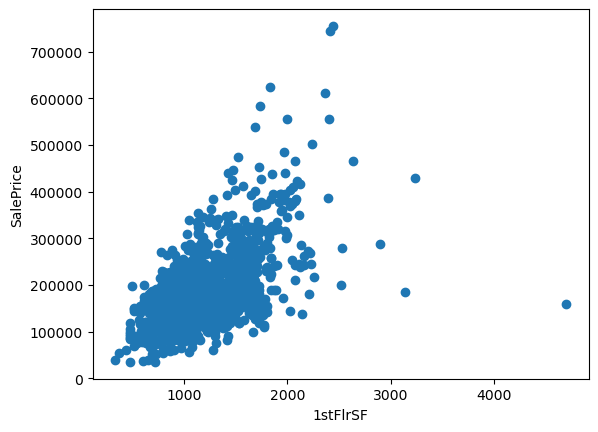

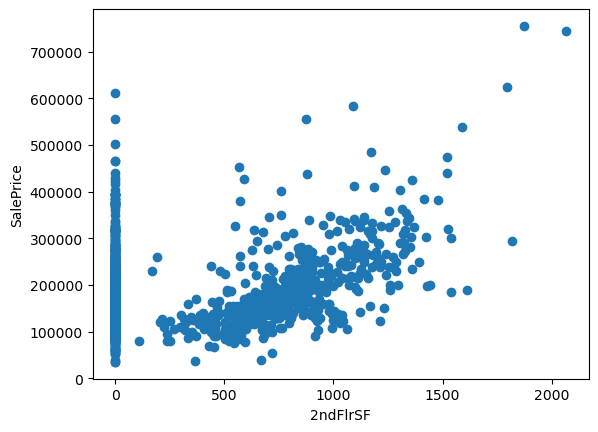

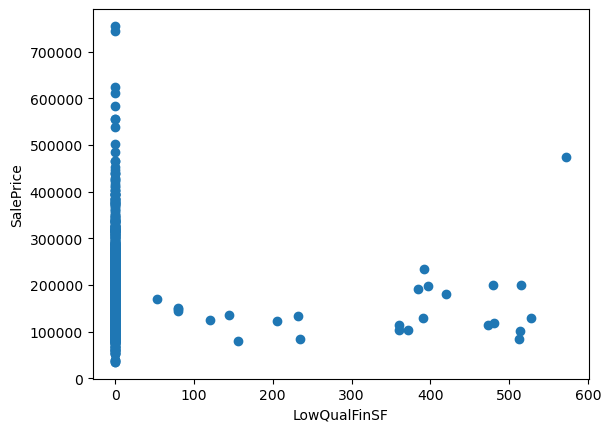

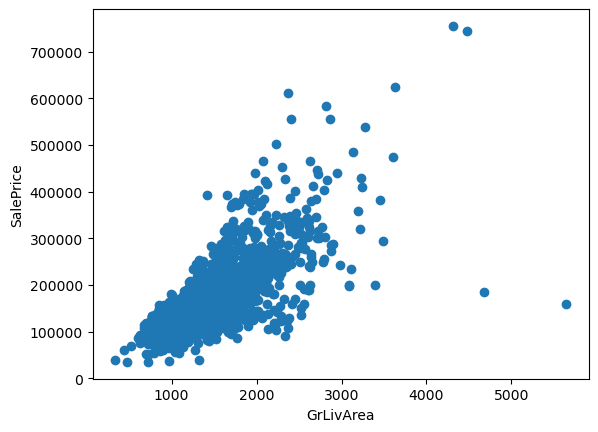

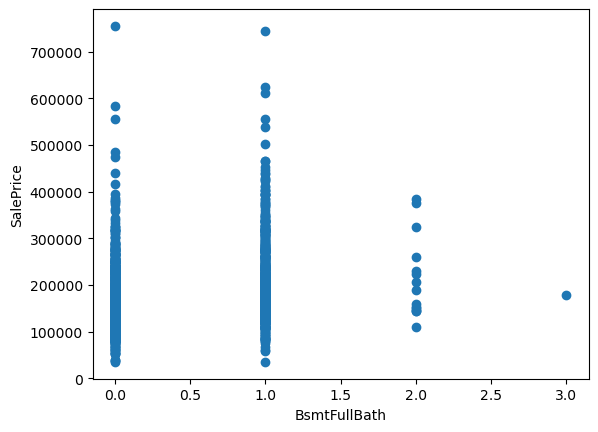

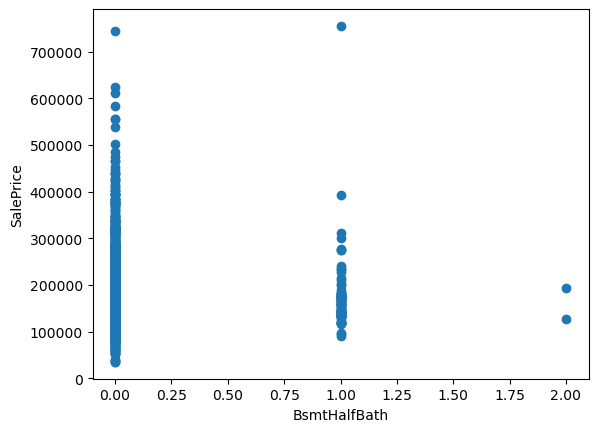

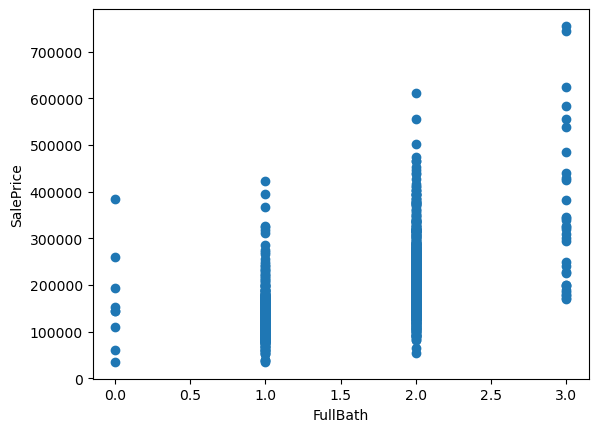

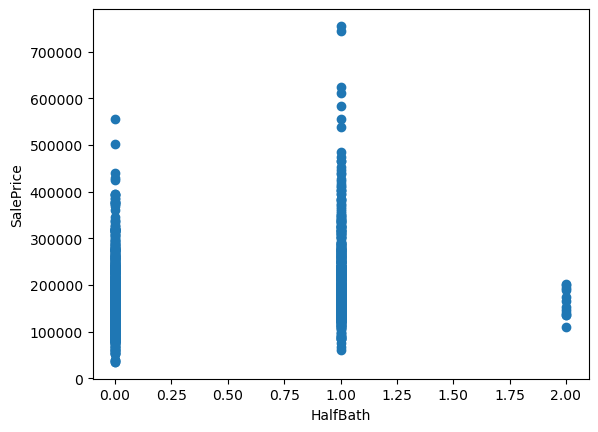

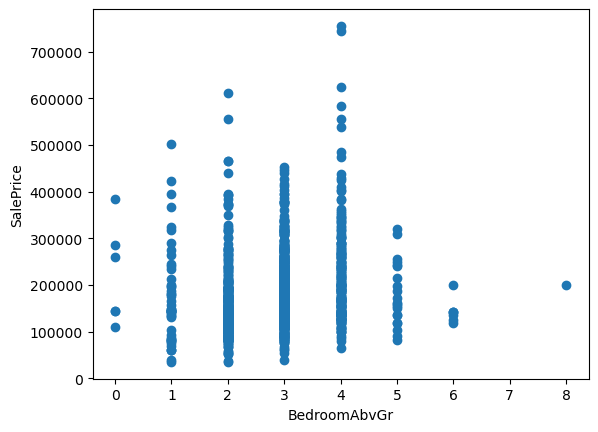

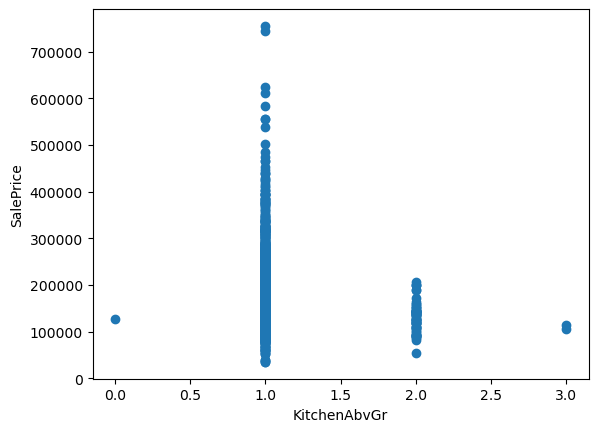

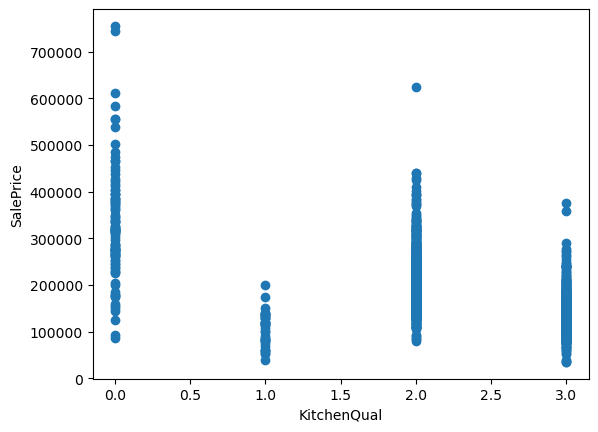

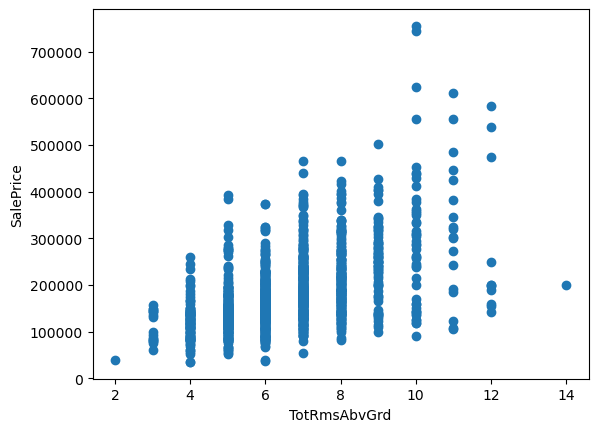

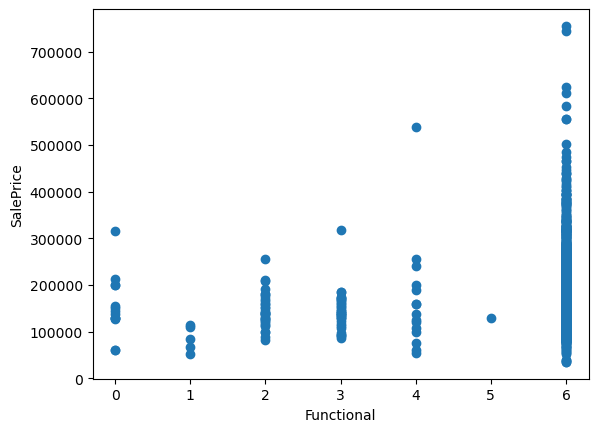

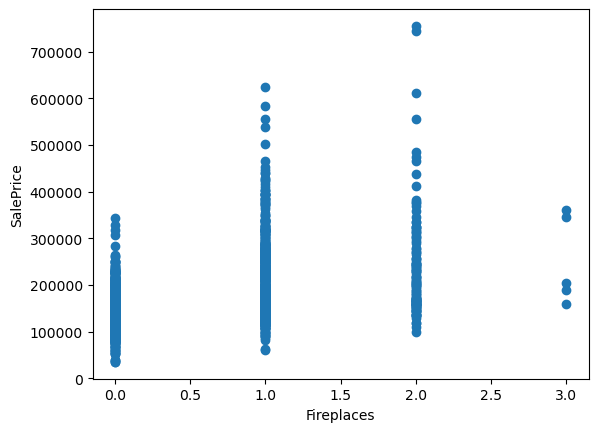

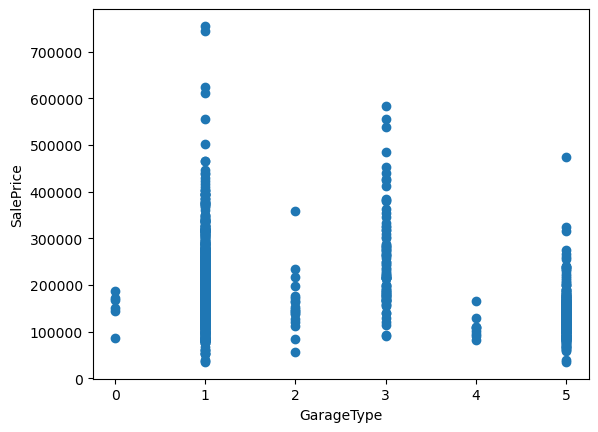

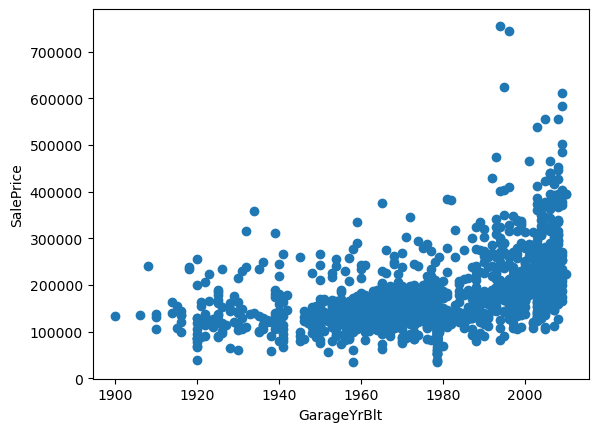

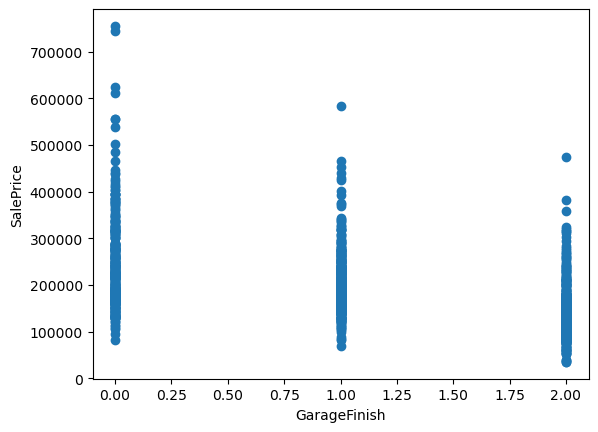

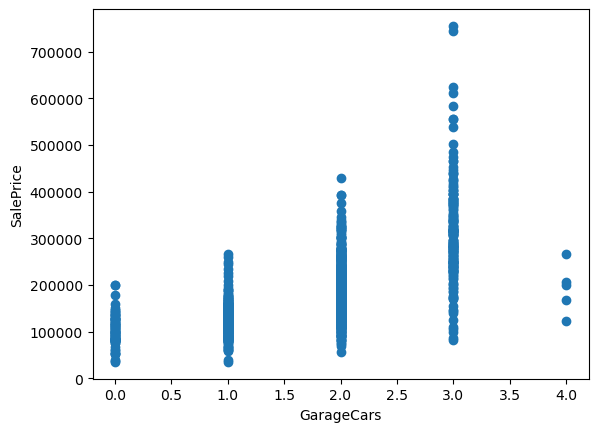

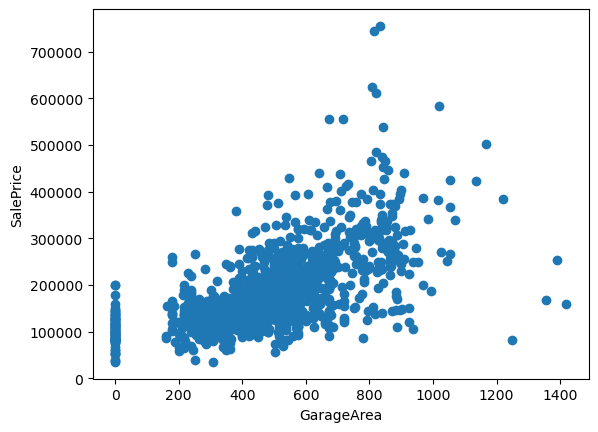

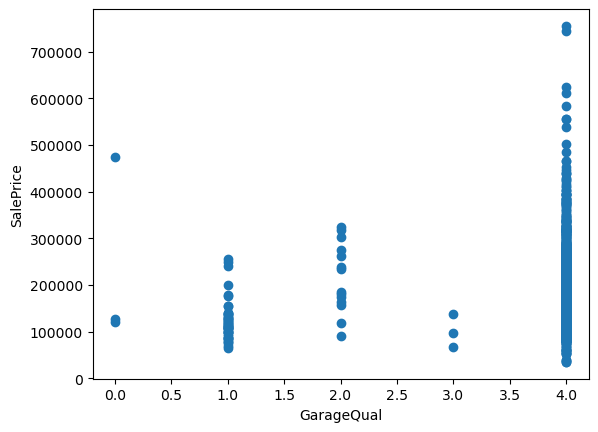

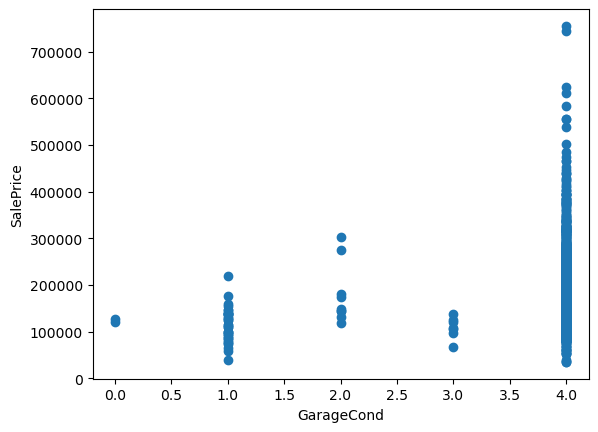

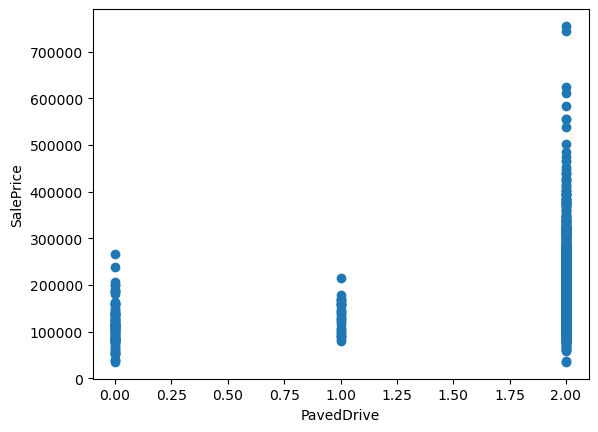

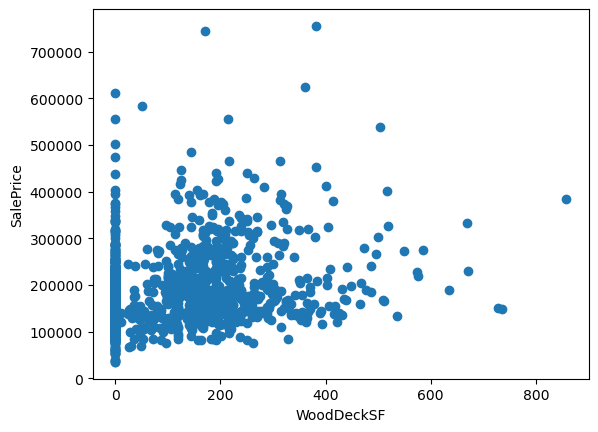

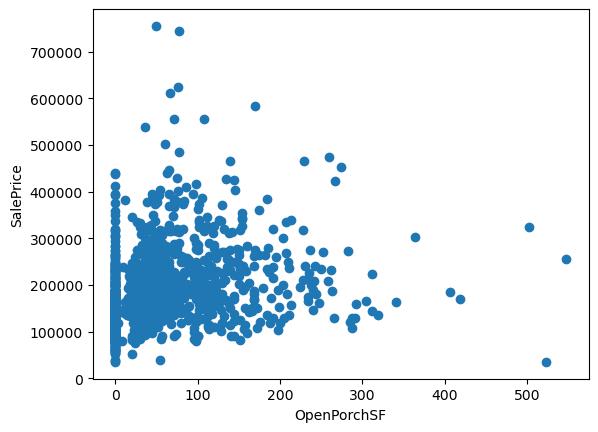

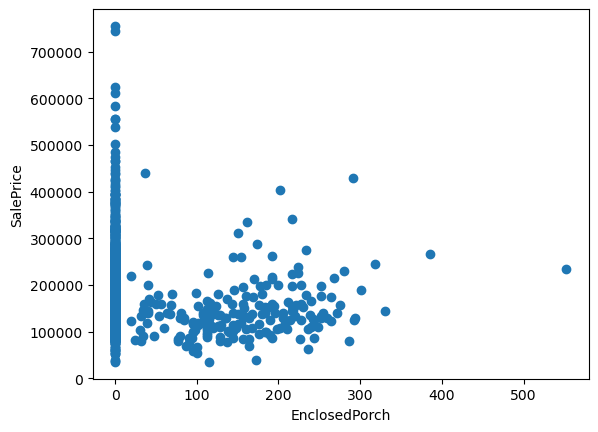

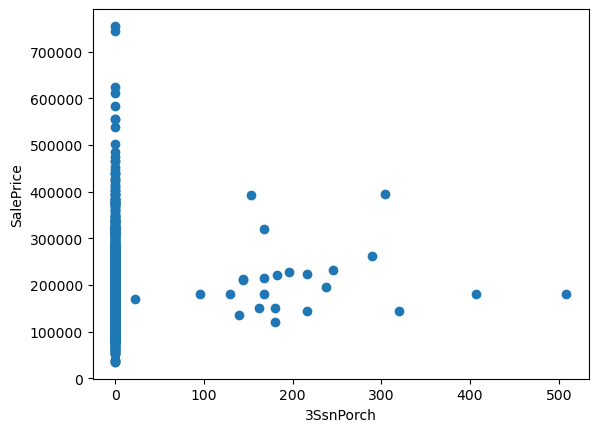

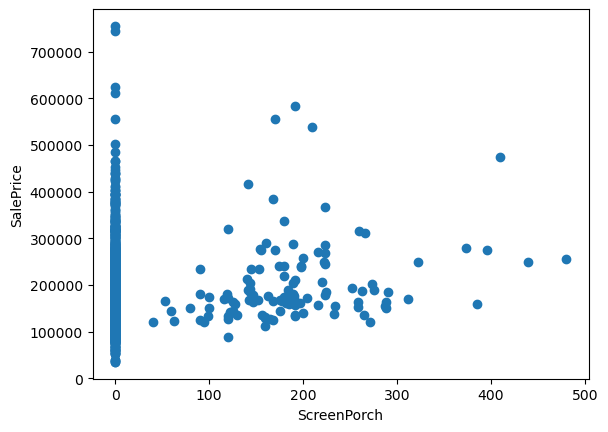

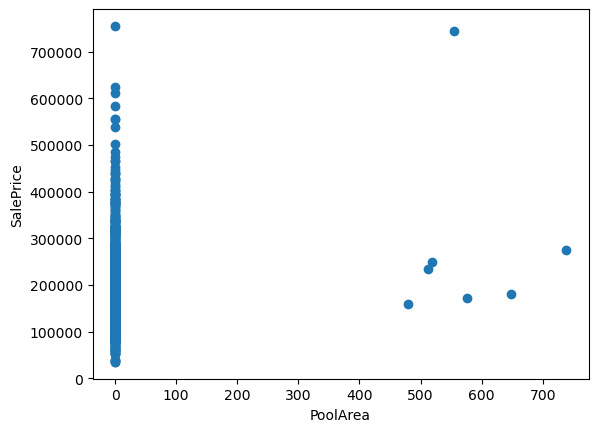

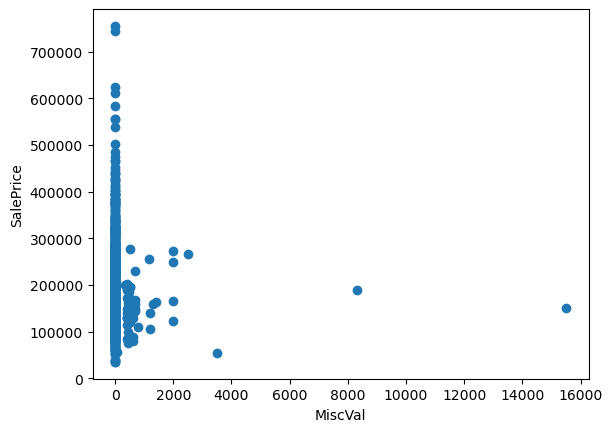

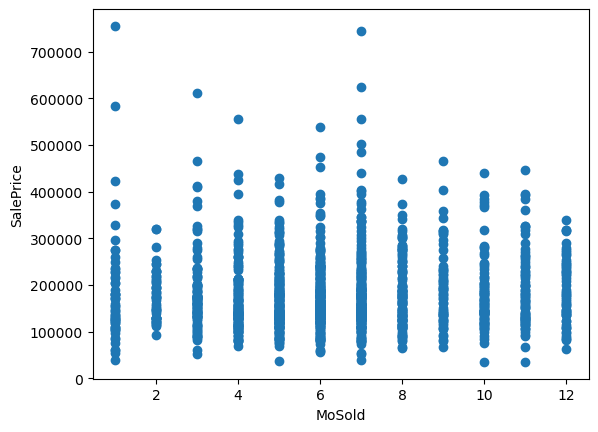

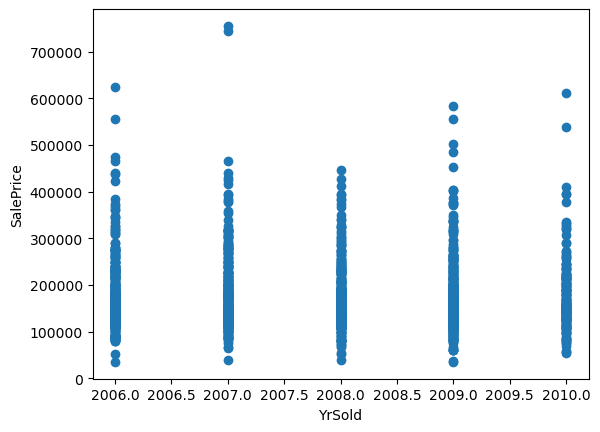

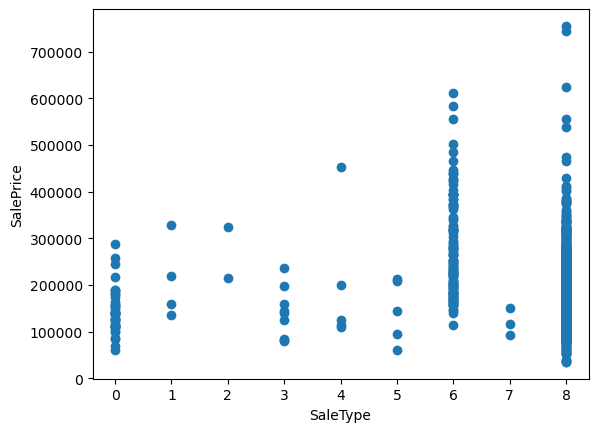

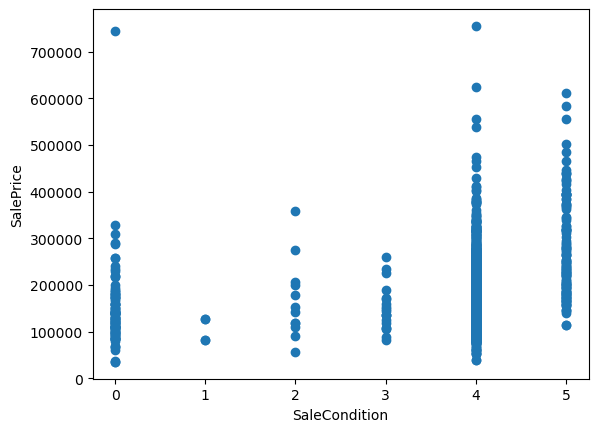

In [39]:
for col in data.columns:
    if col != 'SalePrice':
        plt.scatter(data[col], data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()

In [ ]:
#And store the name of independent variable in a list which show non linear behavior 

In [45]:
non_linear_vars = []
for column_name in data.columns:
    if column_name != 'SalePrice':
        correlation = data['SalePrice'].corr(data[column_name]) # compair corr of each col with salesprice 
        if abs(correlation) < 0.3:
            non_linear_vars.append(column_name)

In [46]:
non_linear_vars           

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
Q2 : Columns which showed non linear behavior apply Polynomial Linear Regression to it ... 
Note : If there is None column which is showing Non Linear Behavior you can take anyone of the
column as independent variable and apply Polynomial Linear Regression to it


In [14]:
data=pd.read_csv("housing.csv")

In [15]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# you can take anyone of the
# column as independent variable and apply Polynomial Linear Regression to it

In [89]:
x = data[['OverallQual']].values
y = data['SalePrice'].values

Text(0, 0.5, 'SalePrice')

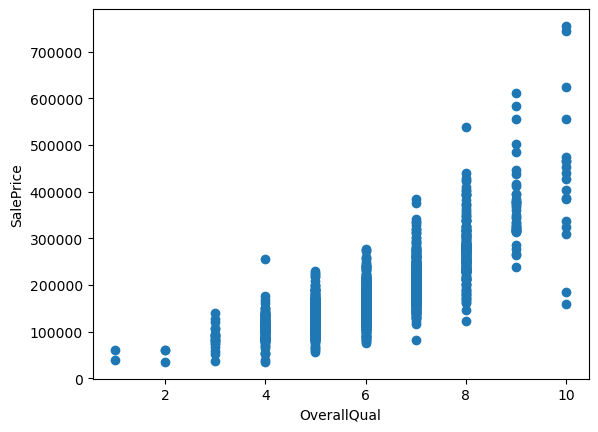

In [90]:
plt.scatter(x,y)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
# define object for a class 
poly= PolynomialFeatures(degree =3)
trans_iv=poly.fit_transform(x)

In [93]:
trans_iv

array([[  1.,   7.,  49., 343.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       ...,
       [  1.,   7.,  49., 343.],
       [  1.,   5.,  25., 125.],
       [  1.,   5.,  25., 125.]])

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(trans_iv,y,test_size=0.25,random_state=50)

regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred = regr.predict(x_test)

In [96]:
mean_squared_error(y_test,y_pred)

1771173341.2960622

In [98]:
acc=r2_score(y_test,y_pred)

In [99]:
print(f"accurcy of these model is:{acc}")

accurcy of these model is:0.7103156969075535


In [ ]:
Q3 : Apply multi Linear regression to the Housing Price Data Set 
	Note : you can take any number of Independent Variable 
	Note :  You need to make 3 models atleast with different number of indepent variable 
	Note : Try to get the best posible accuracy


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [79]:
data1=pd.read_csv("housing.csv")

In [ ]:
# model1

In [80]:
x1 = data1[["OverallQual", "GrLivArea", "GarageCars"]].values
y1 = data1['SalePrice'].values 

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=50)
mregr = LinearRegression()
mregr.fit(x_train,y_train)
y_pred = mregr.predict(x_test)

model_1=r2_score(y_test,y_pred)
print(f"accuracy of our 1st model is:{model_1}")

accuracy of our 1st model is:0.7986396417629208


In [ ]:
# model2 

In [82]:
x2= data1[["OverallQual", "GrLivArea", "GarageCars",'BedroomAbvGr' ,'KitchenAbvGr','FullBath']].values
y2 = data1['SalePrice'].values 
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.2,random_state=50)
mregr = LinearRegression()
mregr.fit(x_train,y_train)
y_pred2 = mregr.predict(x_test)

model_2=r2_score(y_test,y_pred2)
print(f"accuracy of our 2nd model is:{model_2}")

accuracy of our 2nd model is:0.8101438935411602


In [ ]:
# model3 

In [83]:
x3= data1[[ "TotalBsmtSF", "OverallQual", "GrLivArea", "GarageCars",'BedroomAbvGr' ,'KitchenAbvGr','FullBath']].values
y3 = data['SalePrice'].values 

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size=0.2,random_state=50)
mregr = LinearRegression()
mregr.fit(x_train,y_train)
y_pred3 = mregr.predict(x_test)

model_3=r2_score(y_test,y_pred3)
print(f"accuracy of our 3rd model is:{model_3}")

accuracy of our 3rd model is:0.835984159276612


In [1]:
Q4 : We are providing you churn dataset and we expect you to apply logistic regression on it
    and try to change the hyperparameters so that you can get the best possible acuracy

In [5]:
data4= pd.read_csv("ChurnData.csv")

In [6]:
data4.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [7]:
data4.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [10]:
data4

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [11]:
x4=data4[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat']].values

In [12]:
x4

array([[11.   , 33.   ,  7.   , ...,  3.033,  4.913,  4.   ],
       [33.   , 33.   , 12.   , ...,  3.24 ,  3.497,  1.   ],
       [23.   , 30.   ,  9.   , ...,  3.24 ,  3.401,  3.   ],
       ...,
       [ 6.   , 32.   , 10.   , ...,  3.168,  3.85 ,  3.   ],
       [24.   , 30.   ,  0.   , ...,  3.866,  3.219,  4.   ],
       [61.   , 50.   , 16.   , ...,  3.24 ,  5.247,  2.   ]])

In [13]:
y4=data4['churn'].values

In [188]:
# train test split 
x_train,x_test,y_train,y_test = train_test_split(x4,y4,test_size=0.3,random_state=40)

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
# define object for class 
lr=LogisticRegression()

In [191]:
#train the model 
lr.fit(x_train,y_train)

C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
#evaluate 
y_predict=lr.predict(x_test)

In [194]:
#check accuracy 
from sklearn.metrics import accuracy_score

In [195]:
A_S=accuracy_score(y_predict,y_test)
print(f"We have accuracy: {A_S}")

We have accuracy: 0.75


In [196]:
# we have solver in LogisticRegression
# ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

In [197]:
# by using solver we can get best accuracy 
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression(solver='liblinear')
lr2.fit(x_train,y_train)
y_predict2=lr2.predict(x_test)

A_S2=accuracy_score(y_predict2,y_test)
print(f"We get accuracy from liblinear is : {A_S2}")


We get accuracy from liblinear is : 0.7


In [198]:
from sklearn.linear_model import LogisticRegression
lr3=LogisticRegression(solver='newton-cg')
lr3.fit(x_train,y_train)
y_predict3=lr3.predict(x_test)

A_S3=accuracy_score(y_predict3,y_test)
print(f"We get accuracy from newton-cg is : {A_S3}")


We get accuracy from newton-cg is : 0.7166666666666667


In [199]:
from sklearn.linear_model import LogisticRegression
lr4=LogisticRegression(solver='lbfgs')
lr4.fit(x_train,y_train)
y_predict4=lr4.predict(x_test)

A_S4=accuracy_score(y_predict4,y_test)
print(f"We get accuracy from lbfgs is : {A_S4}") 

We get accuracy from lbfgs is : 0.75


C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
from sklearn.linear_model import LogisticRegression
lr5=LogisticRegression(solver='sag')
lr5.fit(x_train,y_train)
y_predict5=lr5.predict(x_test)

A_S5=accuracy_score(y_predict5,y_test)
print(f"We get accuracy from sag is : {A_S5}") 

We get accuracy from sag is : 0.7666666666666667


C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [201]:
from sklearn.linear_model import LogisticRegression
lr6=LogisticRegression(solver='saga')
lr6.fit(x_train,y_train)
y_predict6=lr6.predict(x_test)

A_S6=accuracy_score(y_predict6,y_test)
print(f"We get accuracy from saga is : {A_S6}") 

We get accuracy from saga is : 0.7666666666666667


C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
Q5 : We are providing you the cell dataset and we expect you to use all the independent variables
    for creating the SVM machine learning model and change the hyperparameters so that you 
    can get the best accuracy

In [52]:
data5=pd.read_csv("cell_samples.csv")

In [53]:
data5

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [54]:
# we expect you to use all the independent variables
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [55]:
data5['BareNuc'] = pd.to_numeric(data5['BareNuc'], errors='coerce')
data5['BareNuc'] = data5['BareNuc'].fillna(0).astype(int)

In [56]:
t5=data5['BareNuc']

In [57]:
t5= t5.astype('int64')

In [59]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           699 non-null    int64
 1   Clump        699 non-null    int64
 2   UnifSize     699 non-null    int64
 3   UnifShape    699 non-null    int64
 4   MargAdh      699 non-null    int64
 5   SingEpiSize  699 non-null    int64
 6   BareNuc      699 non-null    int32
 7   BlandChrom   699 non-null    int64
 8   NormNucl     699 non-null    int64
 9   Mit          699 non-null    int64
 10  Class        699 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [60]:
data5.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [61]:
data5.drop(["ID"],axis=1,inplace=True)


In [62]:
x5=data5[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit']].values
y5=data5['Class'].values

In [63]:
# use train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x5,y5,test_size=0.21,random_state=45)

In [64]:
#get a model 
from sklearn.svm import SVC
svm= SVC(kernel = 'linear')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)

In [293]:
accuracy_score(y_predict,y_test)

0.9795918367346939

In [294]:
# so, by using kernel we can get best 
# kernel = 'linear', 'poly', 'rbf', 'sigmoid

In [295]:

from sklearn.svm import SVC
svm2= SVC(kernel = 'poly')
svm2.fit(x_train,y_train)
y_predict2=svm2.predict(x_test)

A_S2=accuracy_score(y_predict2,y_test)
print(f"We get accuracy from poly is : {A_S2}") 

We get accuracy from poly is : 0.9659863945578231


In [296]:
from sklearn.svm import SVC
svm3= SVC(kernel ='rbf')
svm3.fit(x_train,y_train)
y_predict3=svm3.predict(x_test)

A_S3=accuracy_score(y_predict3,y_test)
print(f"We get accuracy from rbf is : {A_S3}") 

We get accuracy from poly is : 0.9727891156462585


In [297]:
from sklearn.svm import SVC
svm4= SVC(kernel = 'sigmoid')
svm4.fit(x_train,y_train)
y_predict4=svm4.predict(x_test)

A_S4=accuracy_score(y_predict4,y_test)
print(f"We get accuracy from sigmoid is : {A_S4}") 

We get accuracy from sigmoid is : 0.43537414965986393


In [ ]:
Q6 :  Take the same cell Dataset and instead of SVM apply logistic regression in it..

In [309]:
data6=pd.read_csv("cell_samples.csv")

In [310]:
data6.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [311]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [312]:
# data6.drop(['ID',' BareNuc'],inplace=True,axis=1)
data6.drop(['ID','BareNuc'], axis = 1, inplace = True)

In [313]:
data6.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [314]:
# convert iv and dv 
x6=data6[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit']].values
y6=data6['Class'].values

In [317]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x6,y6,test_size=0.2,random_state=50)

In [320]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='newton-cg')
LR.fit(x_train,y_train)
LRy_predict=LR.predict(x_test)
A_S=accuracy_score(LRy_predict,y_test)
print(f"We get accuracy from newton-cg is : {A_S}")

We get accuracy from newton-cg is : 0.9642857142857143


In [ ]:
Q7 : we are providing you a dataset apart from churn and cell dataset which is titanic dataset
    remove unnecessary column which are not usefull  with aspect of machine learning and apply 
    label encoding where ever its necessary and store processed data into your memory
	NOTE : Survived is the dependent Column


In [454]:
data7=pd.read_csv("train_ titanic dataset .csv")

In [455]:
data7.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [456]:
# Remove unnecessary columns
data7.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket'], axis=1,inplace=True)

In [457]:
data7

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [458]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.6+ KB


In [459]:
data7.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [460]:
# convet data into iv and dv
x7=data7[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']].values
y7=data7['Survived'].values

In [461]:
x7[:5]

array([[3, 'male', 22.0, 1, 0, 7.25, 'S'],
       [1, 'female', 38.0, 1, 0, 71.2833, 'C'],
       [3, 'female', 26.0, 0, 0, 7.925, 'S'],
       [1, 'female', 35.0, 1, 0, 53.1, 'S'],
       [3, 'male', 35.0, 0, 0, 8.05, 'S']], dtype=object)

In [462]:
# we have to use label enoder for sex and embarked columns
from sklearn.preprocessing import LabelEncoder

In [463]:
le_sex=LabelEncoder()
le_sex.fit(['female','male'])
x7[:,1]=le_sex.transform(x7[:,1])


In [464]:
data7['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [465]:
le_embark=LabelEncoder()
le_embark.fit(['S', 'C', 'Q'])
x7[:,6]=le_embark.transform(x7[:,6])


In [466]:
x7[:5]

array([[3, 1, 22.0, 1, 0, 7.25, 2],
       [1, 0, 38.0, 1, 0, 71.2833, 0],
       [3, 0, 26.0, 0, 0, 7.925, 2],
       [1, 0, 35.0, 1, 0, 53.1, 2],
       [3, 1, 35.0, 0, 0, 8.05, 2]], dtype=object)

In [ ]:
Q8 : Use that processed titanic dataset and apply svm in it 


In [473]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x7,y7,test_size=0.21,random_state=45)

In [474]:
from sklearn.svm import SVC
svm7L= SVC(kernel = 'linear')
svm7L.fit(x_train,y_train)
y_predict7L=svm7L.predict(x_test)

A_S7L=accuracy_score(y_predict7L,y_test)
print(f"We get accuracy from linear is : {A_S7L}") 

We get accuracy from linear is : 0.8266666666666667
